**Question No.1 Parkinson's Detection**

In [89]:
#Importing the necessary modules
import numpy as np
import pandas as pd

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [91]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import scale
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,roc_curve,roc_auc_score,ConfusionMatrixDisplay,precision_score, recall_score,f1_score


In [92]:
df=pd.read_csv("parkinsons.data")

In [93]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [94]:
df.shape

(195, 24)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [96]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [98]:
#Analyzing the data
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [99]:
df.duplicated().sum()

0

In [100]:
#dropping the name coln
df.drop(columns="name",inplace=True)

In [102]:
parkinsons_data=df.drop(columns="status")

In [32]:
parkinsons_data.skew().sort_values()

HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread2             0.144430
D2                  0.430384
spread1             0.432139
MDVP:Fo(Hz)         0.591737
PPE                 0.797491
MDVP:Flo(Hz)        1.217350
Shimmer:APQ3        1.580576
Shimmer:DDA         1.580618
MDVP:Shimmer        1.666480
Shimmer:APQ5        1.798697
MDVP:Shimmer(dB)    1.999389
MDVP:Fhi(Hz)        2.542146
MDVP:APQ            2.618047
MDVP:Jitter(Abs)    2.649071
MDVP:PPQ            3.073892
MDVP:Jitter(%)      3.084946
MDVP:RAP            3.360708
Jitter:DDP          3.362058
NHR                 4.220709
dtype: float64

<Axes: >

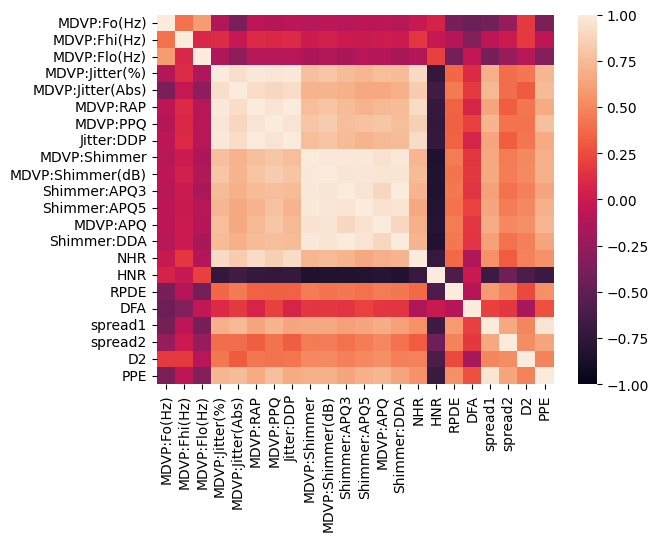

In [103]:
sns.heatmap(parkinsons_data.corr(),vmin=-1, vmax=1)

In [104]:
output_class=df["status"]
output_class.value_counts()

status
1    147
0     48
Name: count, dtype: int64

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>,
        <Axes: title={'center': 'spread2'}>],
       [<Axes: title={'center': 'D2'}>, <Axes: 

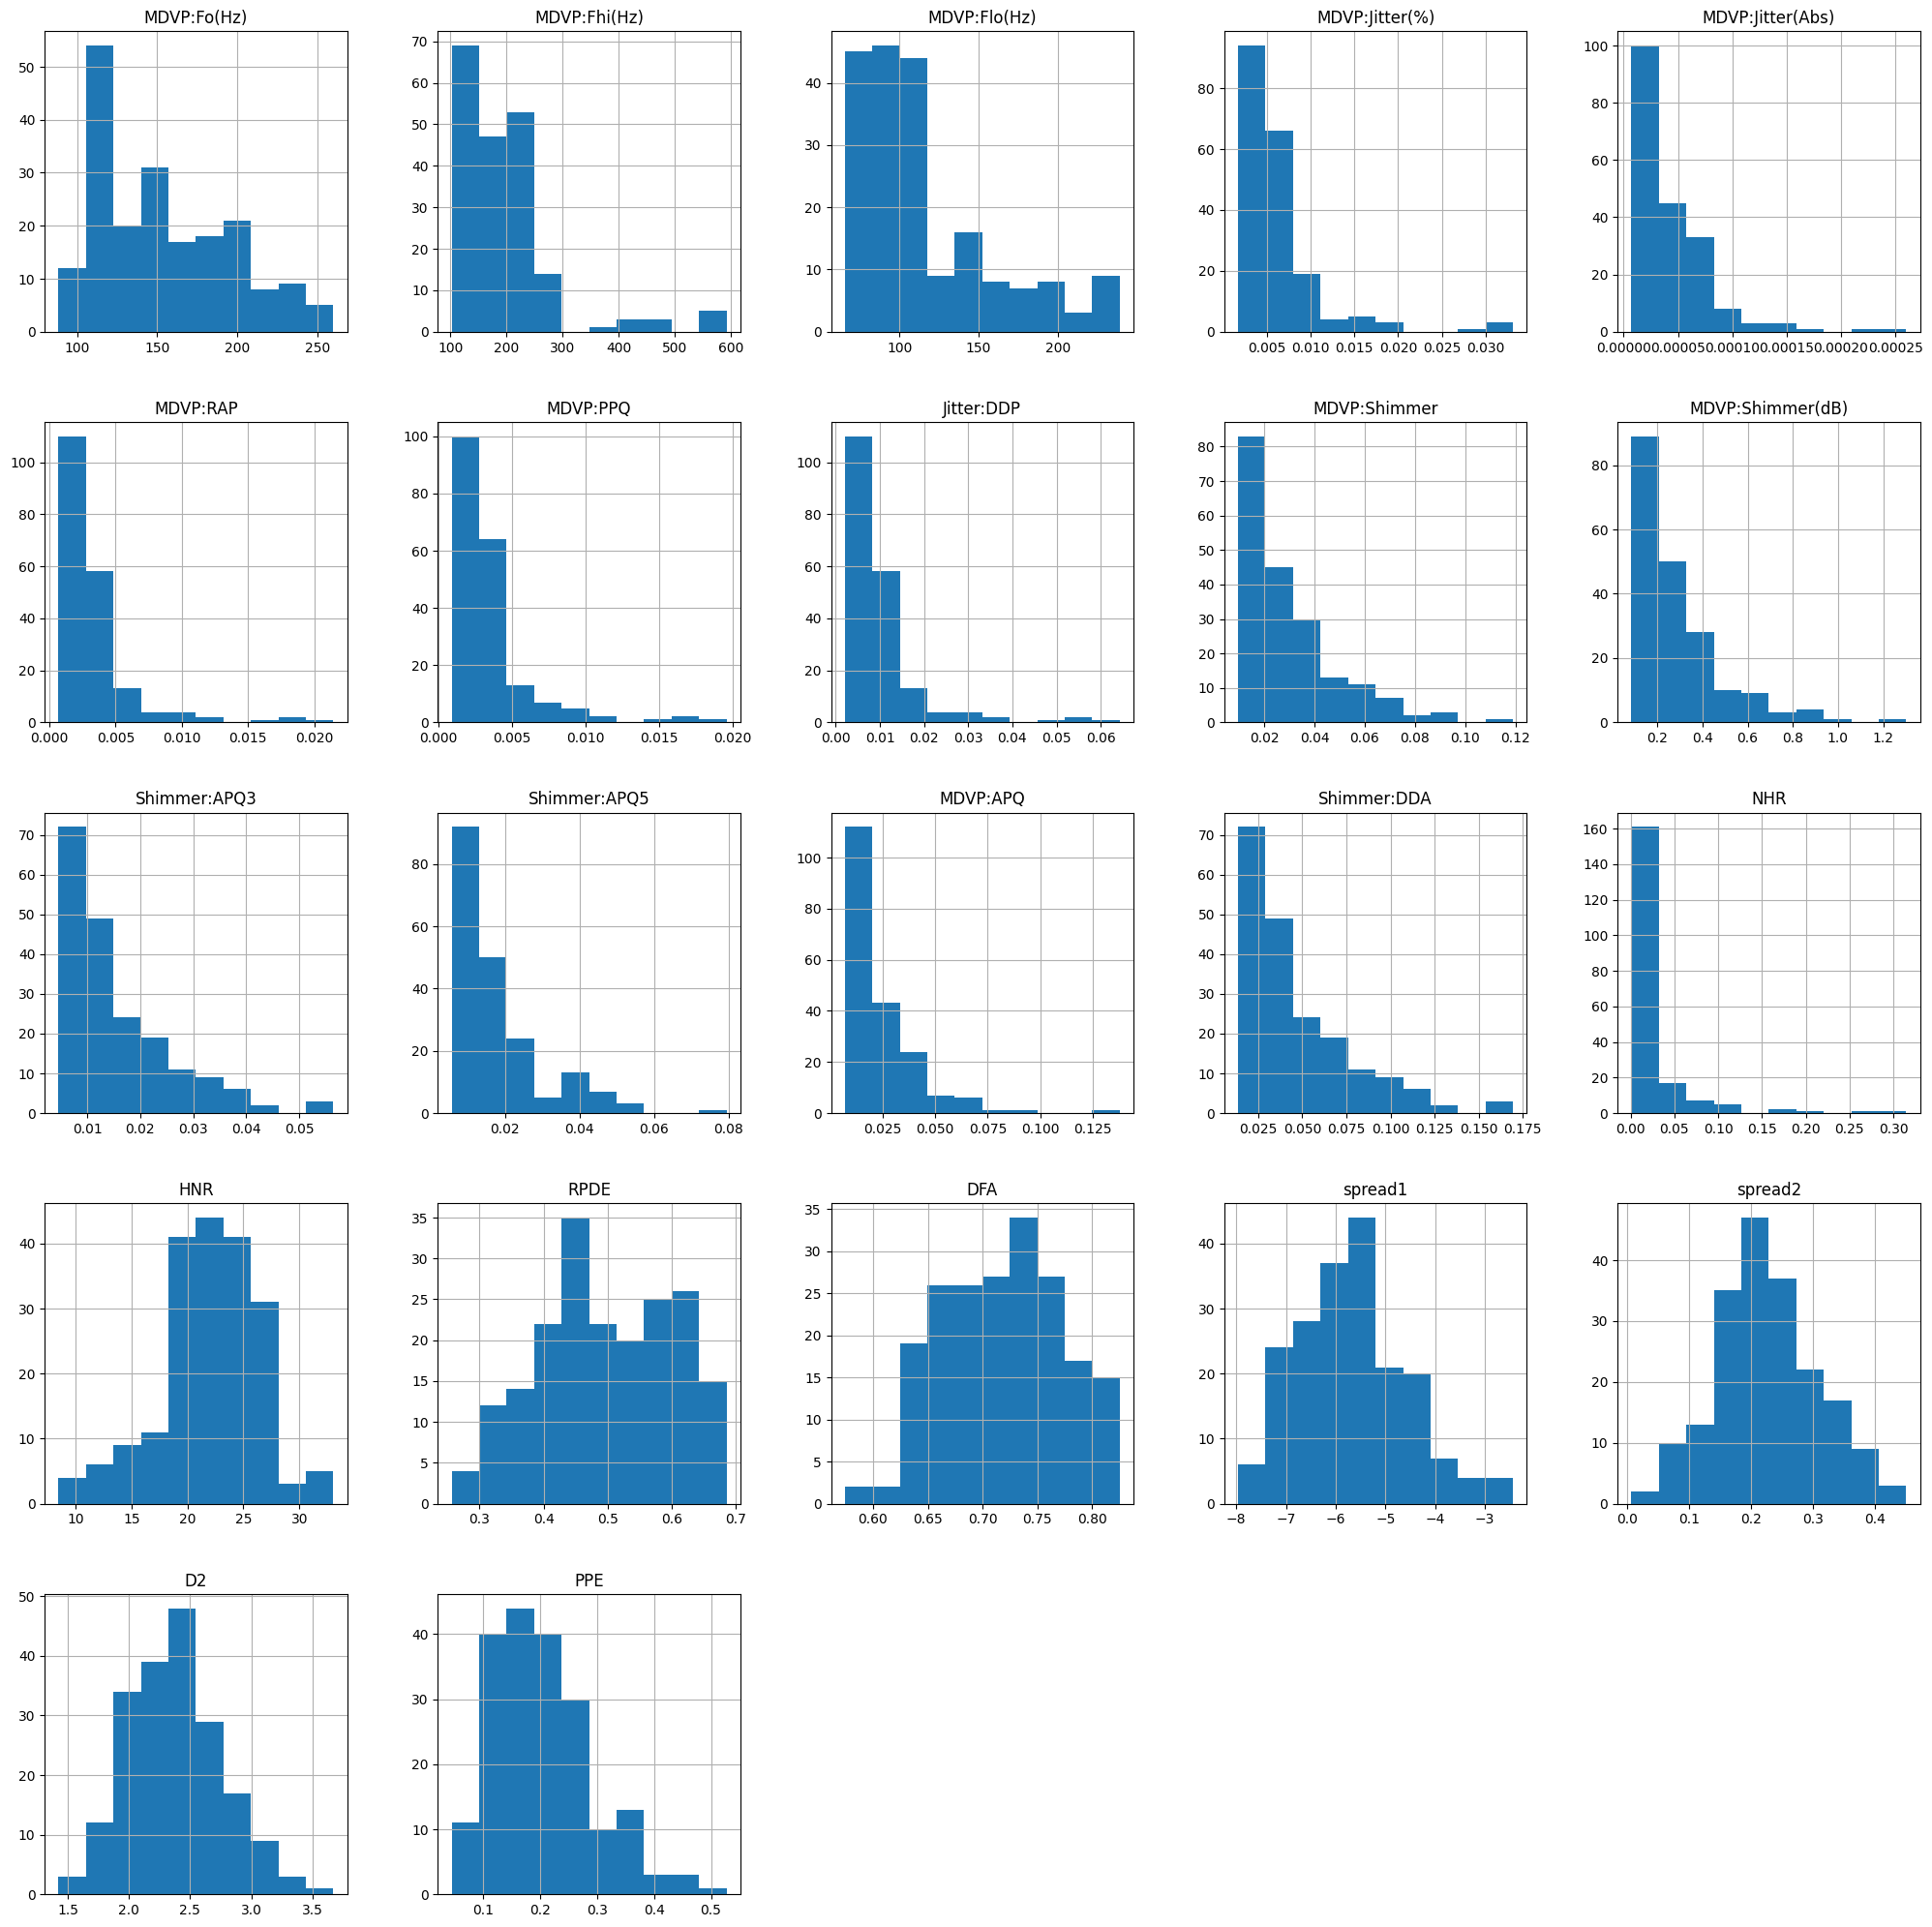

In [105]:
parkinsons_data.hist(figsize=(25,25))

In [106]:
feature_corr= df.corr()
output_corr = feature_corr.sort_values(by='status').iloc[:,-7]
output_corr.to_frame().style.background_gradient(cmap='OrRd')

,status
MDVP:Fo(Hz),-0.383535
MDVP:Flo(Hz),-0.380200
HNR,-0.361515
MDVP:Fhi(Hz),-0.166136
NHR,0.189429
DFA,0.231739
Jitter:DDP,0.266646
MDVP:RAP,0.266668
MDVP:Jitter(%),0.278220
MDVP:PPQ,0.288698


In [146]:
X=df.drop(columns="status")
y=df["status"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [142]:
X_train.shape

(120, 2)

In [110]:
X_test.shape

(39, 22)

In [148]:
#transforming the data based on the min max value
minmax = MinMaxScaler()

X_train_transformed = minmax.fit_transform(X_train)
X_test_transformed = minmax.transform(X_test)


Precision Score is : 77.14
Recall Score is : 96.43
F1-Score Score is : 85.71
F1-Score Score is : 85.71

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.77      0.96      0.86        28

    accuracy                           0.77        39
   macro avg       0.76      0.62      0.63        39
weighted avg       0.77      0.77      0.73        39


Accuracy Score: 0.7692307692307693


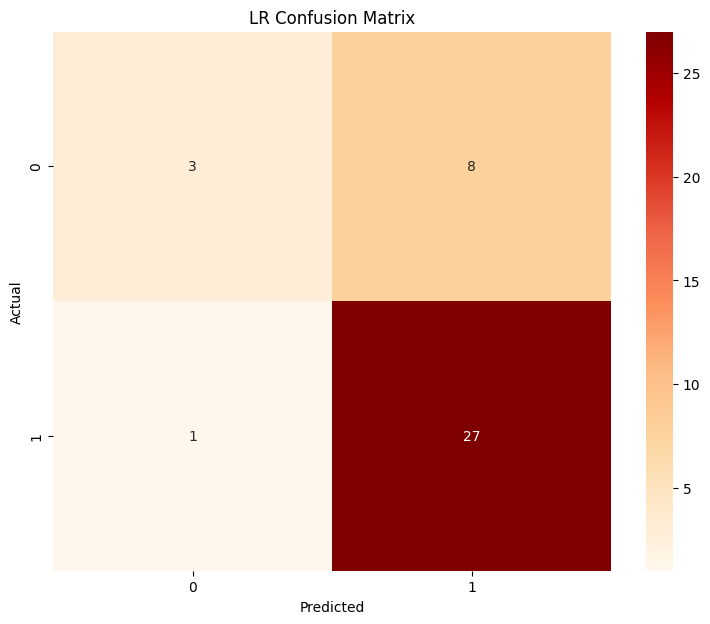

In [149]:
LR = LogisticRegression()
LR.fit(X_train_transformed,y_train)
y_pred_LR = LR.predict(X_test_transformed)
print('Precision Score is :', round(precision_score(y_test, y_pred_LR) * 100,2))
print('Recall Score is :', round(recall_score(y_test, y_pred_LR) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_LR) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_LR) * 100,2))

cm=confusion_matrix(y_test,y_pred_LR)
plt.figure(figsize=(9,7))
fg=sns.heatmap(cm,annot=True,cmap="OrRd")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("LR Confusion Matrix");


print("\nClassification Report:\n", classification_report(y_test, y_pred_LR))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_LR))

Precision Score is : 80.0
Recall Score is : 100.0
F1-Score Score is : 88.89
F1-Score Score is : 88.89

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.80      1.00      0.89        28

    accuracy                           0.82        39
   macro avg       0.90      0.68      0.71        39
weighted avg       0.86      0.82      0.79        39


Accuracy Score: 0.8205128205128205


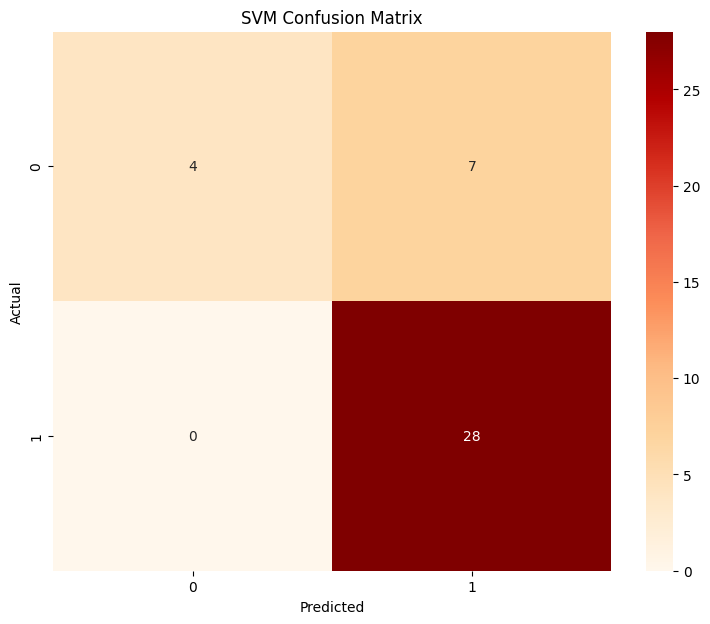

In [150]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_transformed,y_train)
y_pred_SVM = SVM.predict(X_test_transformed)
print('Precision Score is :', round(precision_score(y_test, y_pred_SVM) * 100,2))
print('Recall Score is :', round(recall_score(y_test, y_pred_SVM) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_SVM) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_SVM) * 100,2))

cm=confusion_matrix(y_test,y_pred_SVM)
plt.figure(figsize=(9,7))
fg=sns.heatmap(cm,annot=True,cmap="OrRd")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("SVM Confusion Matrix");

print("\nClassification Report:\n", classification_report(y_test, y_pred_SVM))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_SVM))

Precision Score is : 87.1
Recall Score is : 96.43
F1-Score Score is : 91.53
F1-Score Score is : 91.53

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.87      0.96      0.92        28

    accuracy                           0.87        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.87      0.87      0.86        39


Accuracy Score: 0.8717948717948718


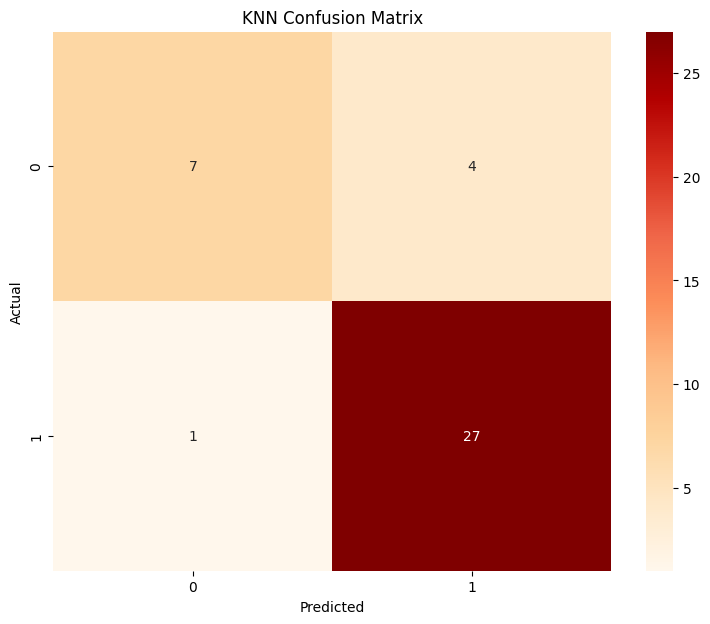

In [151]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_transformed, y_train)
y_pred_KNN = KNN.predict(X_test_transformed)
print('Precision Score is :', round(precision_score(y_test, y_pred_KNN) * 100,2))
print('Recall Score is :', round(recall_score(y_test, y_pred_KNN) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_KNN) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_KNN) * 100,2))

cm=confusion_matrix(y_test,y_pred_KNN)
plt.figure(figsize=(9,7))
fg=sns.heatmap(cm,annot=True,cmap="OrRd")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("KNN Confusion Matrix");

print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_KNN))

Perceptron classification accuracy 0.36666666666666664


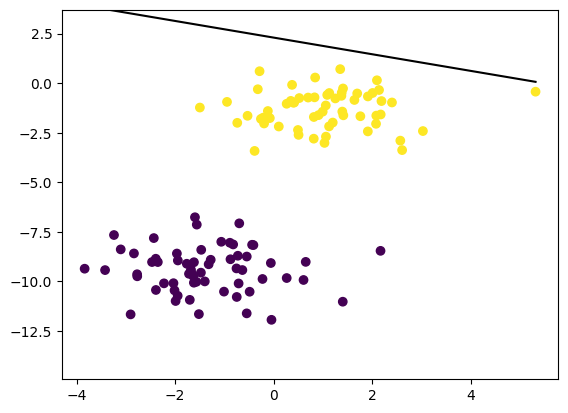

In [153]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train_transformed[:120], y_train)
    predictions = p.predict(X_test_transformed)

    print("Perceptron classification accuracy", accuracy(y_test, predictions[:30]))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

In [157]:
#MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

model = Sequential([
# dense layer 1
Dense(256, activation='sigmoid'),
# dense layer 2
Dense(128, activation='sigmoid'),
# output layer
Dense(10, activation='sigmoid'),
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(X_train_transformed[:120], y_train, epochs=10)

y_pred_mlp = model.evaluate(X_test_transformed[:30], y_test, verbose = 0)

mlp_results = model.evaluate(X_test_transformed[:30], y_test, verbose = 0)
print('Accuracy:', mlp_results[1])

Epoch 1/10
4/4 [==============================] - 2s 6ms/step - loss: 1.9936 - accuracy: 0.2083
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0803 - accuracy: 0.5083
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8053 - accuracy: 0.5083
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7367 - accuracy: 0.4917
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7156 - accuracy: 0.4833
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7074 - accuracy: 0.5333
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7045 - accuracy: 0.4750
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7050 - accuracy: 0.4417
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7001 - accuracy: 0.5083
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7016 - accuracy: 0.4583
Accuracy: 0.5333333611488342


Precision Score is : 86.96
Recall Score is : 71.43
F1-Score Score is : 78.43
F1-Score Score is : 78.43

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.87      0.71      0.78        28

    accuracy                           0.72        39
   macro avg       0.68      0.72      0.69        39
weighted avg       0.77      0.72      0.73        39


Accuracy Score: 0.717948717948718


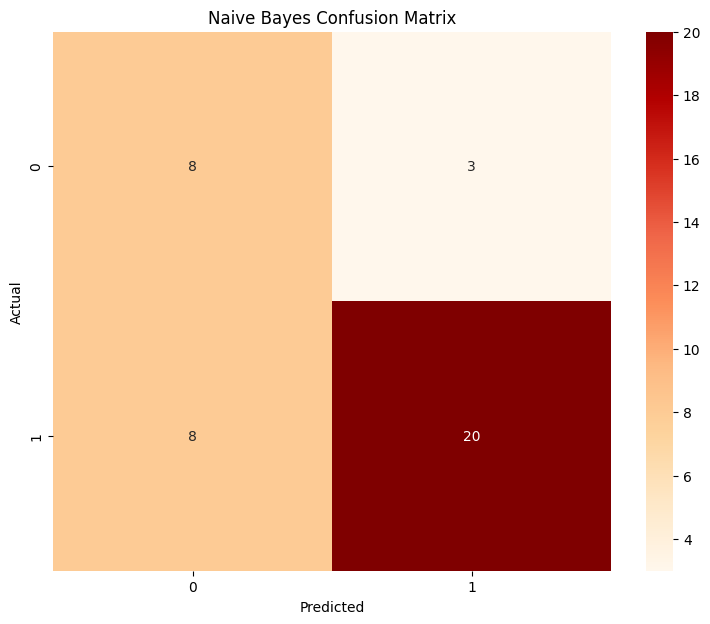

In [152]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_transformed, y_train)
y_pred_nb = classifier.predict(X_test_transformed)
print('Precision Score is :', round(precision_score(y_test, y_pred_nb) * 100,2))
print('Recall Score is :', round(recall_score(y_test, y_pred_nb) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_nb) * 100,2))
print('F1-Score Score is :', round(f1_score(y_test, y_pred_nb) * 100,2))

cm=confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(9,7))
fg=sns.heatmap(cm,annot=True,cmap="OrRd")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Naive Bayes Confusion Matrix");

print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_nb))

**Inference**

The accuracy seems to be maximum in the case of KNN followed by SVM, Logistic Regression, Naive Bayes, Multi Level Perceptron, PLA.
The perceptron based algos being time consuming and not very effective for this kind of problem.